# Model RandomForestRegressor

- Several columns were dropped
- Simple optimized model

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
Mental_1 = pd.read_csv('Datasheet/MH.Clean.1.csv')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import scale
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

### Data for train the model

In [12]:
X = Mental_1.drop(columns=['id', 'Depression'],axis=1)
y = Mental_1['Depression']

In [14]:
# check the param of the model
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
# modification of the param
params = {'ccp_alpha': [0.0 ,0.01],
 'max_depth': [3, 4, 5, 6], # branches of the trees
 'max_features': [0.1, 0.3, 0.6], # features considered
 'max_samples': [0.4, 0.6,0.8], # test-train population
 'n_estimators': [1000], # number trees
 'n_jobs': [-1]} # multicore

In [18]:
n_cv = 3
model = RandomForestRegressor()

scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']

# I made the evaluation with GridSeacrh
grid_solver = GridSearchCV(estimator = model, # model to train
                           param_grid = params, # param_grid
                           scoring = scoring,
                           cv = n_cv, #number of independent 
                           refit = 'neg_mean_squared_error',
                           verbose = 2) 

In [20]:
# searchin for the trees in the forest.
model_result = grid_solver.fit(X, y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   1.1s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   1.1s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   1.1s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.6, n_estimators=1000, n_jobs=-1; total time=   1.3s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.6, n_estimators=1000, n_jobs=-1; total time=   1.3s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.6, n_estimators=1000, n_jobs=-1; total time=   1.3s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.8, n_estimators=1000, n_jobs=-1; total time=   1.3s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.8, n_estimators=1000, 

In [22]:
model_result.best_estimator_

RandomForestRegressor(max_depth=6, max_features=0.6, max_samples=0.4,
                      n_estimators=1000, n_jobs=-1)

In [24]:
results = model_result.cv_results_
results = pd.DataFrame(results)

In [26]:
results[['mean_test_neg_mean_squared_error','params','param_max_depth','param_max_samples']]

,mean_test_neg_mean_squared_error,params,param_max_depth,param_max_samples
0,-0.094522,"{'ccp_alpha': 0.0, 'max_depth': 3, 'max_featur...",3,0.4
1,-0.094943,"{'ccp_alpha': 0.0, 'max_depth': 3, 'max_featur...",3,0.6
2,-0.094968,"{'ccp_alpha': 0.0, 'max_depth': 3, 'max_featur...",3,0.8
3,-0.075988,"{'ccp_alpha': 0.0, 'max_depth': 3, 'max_featur...",3,0.4
4,-0.075278,"{'ccp_alpha': 0.0, 'max_depth': 3, 'max_featur...",3,0.6
...,...,...,...,...
67,-0.084338,"{'ccp_alpha': 0.01, 'max_depth': 6, 'max_featu...",6,0.6
68,-0.085521,"{'ccp_alpha': 0.01, 'max_depth': 6, 'max_featu...",6,0.8
69,-0.068197,"{'ccp_alpha': 0.01, 'max_depth': 6, 'max_featu...",6,0.4
70,-0.068409,"{'ccp_alpha': 0.01, 'max_depth': 6, 'max_featu...",6,0.6


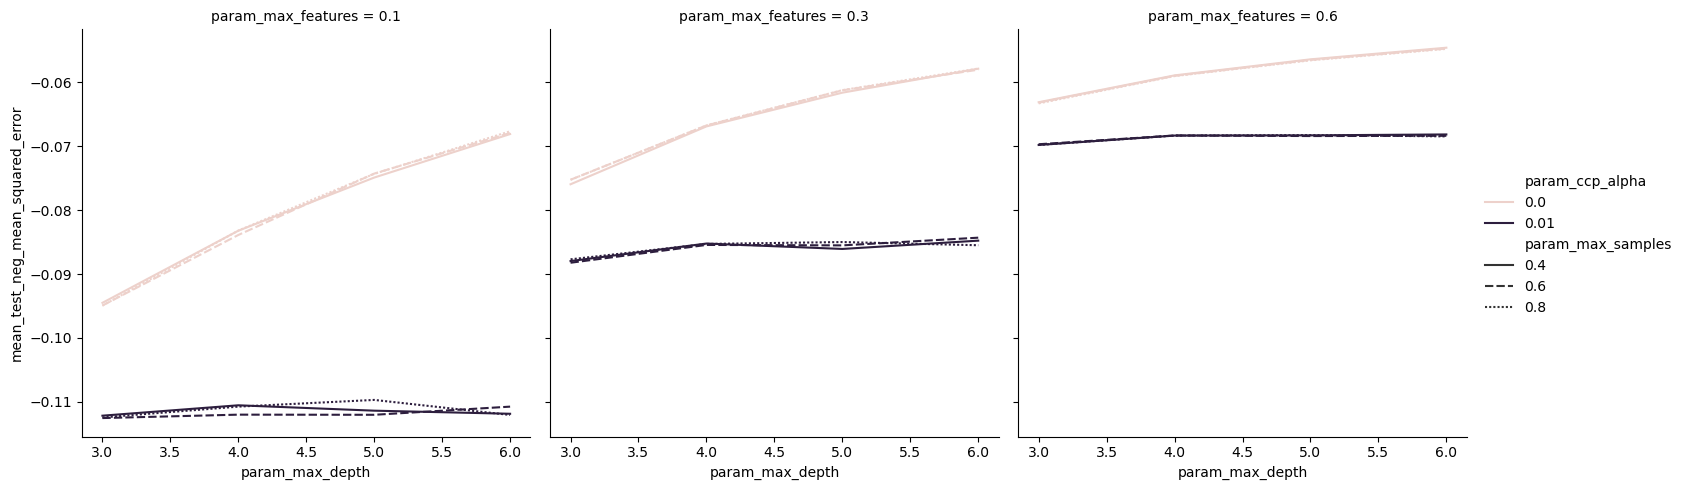

In [28]:
sns.relplot(x = "param_max_depth", 
            y = "mean_test_neg_mean_squared_error", # error in y axis
            style="param_max_samples", # max number % of rows by tree
            hue="param_ccp_alpha",
            col="param_max_features",
            kind = "line", data=results)

In [30]:
dep_resoult = model_result.best_estimator_

In [32]:
y_pred_V1 = dep_resoult.predict(X)
y_pred_V1

array([0.00495455, 0.84596495, 0.55453403, ..., 0.27324441, 0.06228527,
       0.76827576])

In [34]:
threshold = 0.5
y_pred_V1_bin = np.where(y_pred_V1 > threshold, 1, 0)
y_pred_V1_bin

array([0, 1, 1, ..., 0, 0, 1])

In [36]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["No depresive","Depressive"]
    cm=confusion_matrix(y,y_pred_V1_bin)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

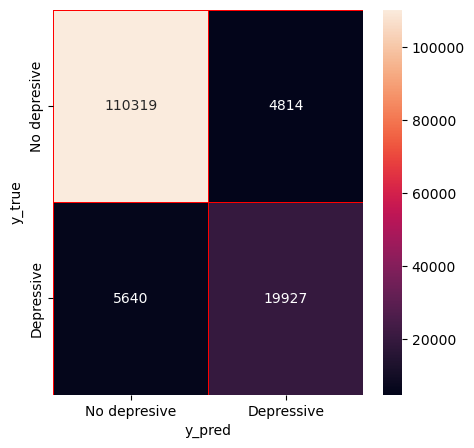

In [48]:
confusion(y,y_pred_V1_bin)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred_V1_bin)

0.9257000710732054

The cross-validation is done in only 3; the accuracy is slightly lower than 5.

In [58]:
grid_solver.best_estimator_

RandomForestRegressor(max_depth=6, max_features=0.6, max_samples=0.4,
                      n_estimators=1000, n_jobs=-1)

# apply the best estimator to Test dataframe

In [72]:
Mental_1 = pd.read_csv('Datasheet/MH.Clean.Test.1.csv')

In [86]:
Mental_1.drop(columns=['id'],axis=1)

,Gender,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction
0,0,53.0,0,9.0,3.0,1,2.0,5.0
1,1,58.0,0,6.0,4.0,0,2.0,4.0
2,0,53.0,1,12.0,4.0,0,4.0,1.0
3,1,23.0,1,10.0,4.0,0,5.0,1.0
4,0,47.0,1,3.0,4.0,0,5.0,5.0
...,...,...,...,...,...,...,...,...
93795,1,49.0,1,2.0,2.0,1,3.0,5.0
93796,0,29.0,1,11.0,3.0,1,5.0,1.0
93797,0,24.0,0,7.0,1.0,0,1.0,4.0
93798,1,23.0,1,7.0,5.0,1,4.0,2.0


In [77]:
modelo_MH = model_result.best_estimator_

In [79]:
modelo_MH

RandomForestRegressor(max_depth=6, max_features=0.6, max_samples=0.4,
                      n_estimators=1000, n_jobs=-1)

In [88]:
y_pre = modelo_MH.predict(Mental_1.drop(columns=['id'],axis=1))

In [90]:
y_pre

array([0.00162874, 0.00156994, 0.06148592, ..., 0.05113231, 0.91394167,
       0.01235383])

In [92]:
# define a threshold
threshold = 0.5
y_pre_bin = np.where(y_pre > threshold, 1, 0)

In [94]:
y_pre_bin

array([0, 0, 0, ..., 0, 1, 0])

In [96]:
Mental_1['Depression']= y_pre_bin

In [98]:
Mental_1

,id,Gender,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction,Depression
0,140700,0,53.0,0,9.0,3.0,1,2.0,5.0,0
1,140701,1,58.0,0,6.0,4.0,0,2.0,4.0,0
2,140702,0,53.0,1,12.0,4.0,0,4.0,1.0,0
3,140703,1,23.0,1,10.0,4.0,0,5.0,1.0,1
4,140704,0,47.0,1,3.0,4.0,0,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...
93795,234495,1,49.0,1,2.0,2.0,1,3.0,5.0,0
93796,234496,0,29.0,1,11.0,3.0,1,5.0,1.0,1
93797,234497,0,24.0,0,7.0,1.0,0,1.0,4.0,0
93798,234498,1,23.0,1,7.0,5.0,1,4.0,2.0,1


In [101]:
Mental_1['Depression'].value_counts()

Depression
0    77251
1    16549
Name: count, dtype: int64

In [107]:
print(Mental_1.keys())

Index(['id', 'Gender', 'Age', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Pressure', 'Satisfaction',
       'Depression'],
      dtype='object')


In [109]:
sample_submission = Mental_1.drop(columns=['Gender', 'Age', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress','Family History of Mental Illness', 'Pressure', 'Satisfaction'],axis=1)

In [111]:
sample_submission

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [114]:
sample_submission.to_csv('sample_submission_1.csv', index=False)